<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [ ]:
# Base
from IPython.display import YouTubeVideo
# Object from Base Python
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
nlp = spacy.load("en_core_web_lg")
nlp.Defaults.stop_words

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

YouTubeVideo('Jml7NVYm8cs')

In [10]:
#clean up data
shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops['review'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

In [ ]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [13]:
%pwd

'c:\\Users\\becca\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [ ]:
# Start here 
STOP_WORDS = nlp.Defaults.stop_words.union(["it's",'1', "i'm", "i've", 'place', "-"])

# Tokenizer Pipe
tokens = []

""" tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [16]:
shops['tokens'].head()

0    [ , 11/25/2016, check-in, love, love, loved, a...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, check-in, listed, brunch, spot...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, check-in, located, northcross, ...
Name: tokens, dtype: object

In [18]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,,7616,22606,1.0,0.055254,0.055254,1.000000
33,coffee,4210,8058,2.0,0.019696,0.074950,0.552784
96,great,2438,3250,3.0,0.007944,0.082894,0.320116
167,like,2034,2902,4.0,0.007093,0.089987,0.267069
161,good,2084,2779,5.0,0.006793,0.096779,0.273634


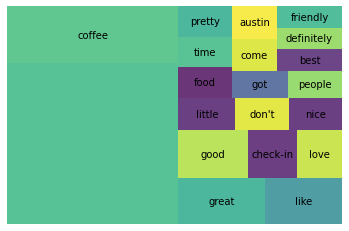

In [20]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [22]:
good_shops = shops[(shops.star_rating == ' 5.0 star rating ') | (shops.star_rating == ' 4.0 star rating ')]
bad_shops = shops[(shops.star_rating == ' 1.0 star rating ') | (shops.star_rating == ' 2.0 star rating ') | (shops.star_rating == ' 3.0 star rating ')]

In [24]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,date,review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[ , 11/25/2016, check-in, love, love, loved, a..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,"[ , 11/30/2016, check-in, listed, brunch, spot..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016,1 check-in They are located within the Northcr...,"[ , 12/3/2016, check-in, located, northcross, ..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,11/20/2016,1 check-in Very cute cafe! I think from the mo...,"[ , 11/20/2016, check-in, cute, cafe!, think, ..."


In [26]:
bad_shops.head()

,coffee_shop_name,full_review_text,star_rating,date,review,tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating Howe...,"[ , 11/25/2016, cool, decor!, good, drinks, ni..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,10/25/2016,"1 check-in Ok, let's try this approach... Pros...","[ , 10/25/2016, check-in, ok,, let's, try, app..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,11/20/2016,"The store has A+ decoration, but honestly, the...","[ , 11/20/2016, store, a+, decoration,, honest..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,11/17/2016,1 check-in Listed in 2016 - The Third Time is ...,"[ , 11/17/2016, check-in, listed, 2016, time, ..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,12/2/2016,"Okay, so after visiting my friends in LA and t...","[ , 12/2/2016, okay,, visiting, friends, la, t..."


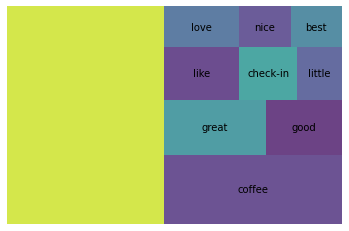

In [28]:
wc_good_shops = count(good_shops['tokens'])
wc_top10 = wc_good_shops[wc_good_shops['rank'] <= 10]
squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

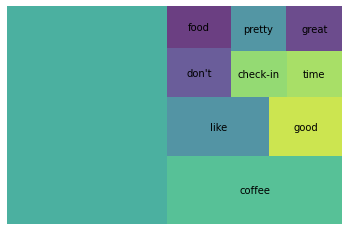

In [30]:
wc_bad_shops = count(bad_shops['tokens'])
wc_top10_bad = wc_bad_shops[wc_bad_shops['rank'] <= 10]
squarify.plot(sizes=wc_top10_bad['pct_total'], label=wc_top10_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [32]:
wc_good_shops = count(good_shops['tokens'])
wc_bad_shops = count(bad_shops['tokens'])

In [34]:
shops.loc[(shops.star_rating == ' 5.0 star rating ') | (shops.star_rating == ' 4.0 star rating '), 'rating'] = 'good'
shops.loc[(shops.star_rating == ' 3.0 star rating ') | (shops.star_rating == ' 2.0 star rating ') | (shops.star_rating == ' 1.0 star rating '), 'rating'] = 'bad'

In [35]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,review,tokens,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[ , 11/25/2016, check-in, love, love, loved, a...",good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[ , 12/2/2016, listed, date, night:, austin,, ...",good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,"[ , 11/30/2016, check-in, listed, brunch, spot...",good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating Howe...,"[ , 11/25/2016, cool, decor!, good, drinks, ni...",bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016,1 check-in They are located within the Northcr...,"[ , 12/3/2016, check-in, located, northcross, ...",good


In [37]:
import scattertext as st

corpus = st.CorpusFromPandas(shops, category_col='rating', text_col='full_review_text', nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='good',
    category_name='good',
    not_category_name='bad',
    width_in_pixels=1000,
    # metadata=subset_df['reviews.rating']
    )
open('scattertext_explorer.html' , 'w').write(html)

6642666

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

